In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score
from itertools import chain, combinations

In [3]:
df = pd.read_csv('http://www.ppgia.pucpr.br/~jean.barddal/datascience/iris.csv')

In [4]:
df.head(3)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa


In [6]:
# funcao que gera as combinacoes possiveis (conjunto potencia)
def powerset(valores):
  # powerset([1,2,3]) => (), (1), (2), (3), (1,2), (1,3), (2,3), (1,2,3)
  # d valores resulta em 2^d combinacoes
  s = list(valores)
  return chain.from_iterable(combinations(s,r) for r in range(1, len(s) + 1))

In [8]:
list(powerset([1,2,3]))

[(1,), (2,), (3,), (1, 2), (1, 3), (2, 3), (1, 2, 3)]

In [9]:
TARGET_COL = 'variety'
colunas = list(df.columns.values)
colunas.remove(TARGET_COL)

In [10]:
colunas

['sepal.length', 'sepal.width', 'petal.length', 'petal.width']

In [11]:
combinacoes = list(powerset(colunas))

In [12]:
combinacoes

[('sepal.length',),
 ('sepal.width',),
 ('petal.length',),
 ('petal.width',),
 ('sepal.length', 'sepal.width'),
 ('sepal.length', 'petal.length'),
 ('sepal.length', 'petal.width'),
 ('sepal.width', 'petal.length'),
 ('sepal.width', 'petal.width'),
 ('petal.length', 'petal.width'),
 ('sepal.length', 'sepal.width', 'petal.length'),
 ('sepal.length', 'sepal.width', 'petal.width'),
 ('sepal.length', 'petal.length', 'petal.width'),
 ('sepal.width', 'petal.length', 'petal.width'),
 ('sepal.length', 'sepal.width', 'petal.length', 'petal.width')]

In [14]:
# laco de repeticao para testar as diferentes combinacoes de atributos

for comb in combinacoes:

  # pega subconjunto de colunas para o modelo
  list_features = list(comb)

  # criar X e y
  X, y = df[list_features], df[TARGET_COL]


  # listas de resultados
  accs_knn = []
  accs_dt = []

  # leave one out
  loo = LeaveOneOut()

  # treinar e testar os modelos
  for train_index , test_index in loo.split(X):
    # obtendo dados de treino e teste
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]

    # treinar o knn
    knn = KNeighborsClassifier(1, algorithm='brute')

    # treinar a arvore de decisao
    dt = DecisionTreeClassifier(criterion="entropy", 
                                min_samples_split=2, 
                                min_impurity_decrease=0.25)
    
    knn.fit(X_train, y_train)
    dt.fit(X_train, y_train)


    # testar os modelos
    y_pred_knn = knn.predict(X_test)
    y_pred_dt = dt.predict(X_test)


    # medir se os modelos acertaram ou nao (acuracia)
    acc_knn = accuracy_score(y_test, y_pred_knn)
    acc_dt = accuracy_score(y_test, y_pred_dt)

    # guardando os resultados na lista global
    accs_knn.append(acc_knn)
    accs_dt.append(acc_dt)

  # imprimir os resultados de acuracia media
  print('-' * 30)
  print(f'FEATURES USADAS: {comb}')
  print(f'\t KNN = {100.0 * sum(accs_knn) / len(accs_knn)}')
  print(f'\t DT = {100.0 * sum(accs_dt) / len(accs_dt)}')


------------------------------
FEATURES USADAS: ('sepal.length',)
	 KNN = 58.666666666666664
	 DT = 62.666666666666664
------------------------------
FEATURES USADAS: ('sepal.width',)
	 KNN = 48.0
	 DT = 52.666666666666664
------------------------------
FEATURES USADAS: ('petal.length',)
	 KNN = 88.0
	 DT = 94.0
------------------------------
FEATURES USADAS: ('petal.width',)
	 KNN = 88.0
	 DT = 95.33333333333333
------------------------------
FEATURES USADAS: ('sepal.length', 'sepal.width')
	 KNN = 70.0
	 DT = 62.666666666666664
------------------------------
FEATURES USADAS: ('sepal.length', 'petal.length')
	 KNN = 91.33333333333333
	 DT = 94.0
------------------------------
FEATURES USADAS: ('sepal.length', 'petal.width')
	 KNN = 92.66666666666667
	 DT = 95.33333333333333
------------------------------
FEATURES USADAS: ('sepal.width', 'petal.length')
	 KNN = 92.0
	 DT = 94.0
------------------------------
FEATURES USADAS: ('sepal.width', 'petal.width')
	 KNN = 92.66666666666667
	 DT

### RFECV

In [15]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

In [16]:
TARGET_COL = 'variety'
colunas = list(df.columns.values)
colunas.remove(TARGET_COL)

In [17]:
X, y = df[colunas], df[TARGET_COL]

In [18]:
lr = LogisticRegression(max_iter=1000)
dt = DecisionTreeClassifier()

In [19]:
loo = LeaveOneOut()

In [20]:
rfe_dt = RFECV(estimator=dt, cv=loo, scoring='accuracy')
rfe_lr = RFECV(estimator=lr, cv=loo, scoring='accuracy')

rfe_dt.fit(X,y)
rfe_lr.fit(X,y)

RFECV(cv=LeaveOneOut(),
      estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                   fit_intercept=True, intercept_scaling=1,
                                   l1_ratio=None, max_iter=1000,
                                   multi_class='auto', n_jobs=None,
                                   penalty='l2', random_state=None,
                                   solver='lbfgs', tol=0.0001, verbose=0,
                                   warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

In [22]:
print('--- DT ---')
print(rfe_dt.n_features_) # qtas features foram selecionadas
print(rfe_dt.support_) # quais foram selecionadas
print(np.array(colunas)[rfe_dt.support_]) # verificando as colunas em si

--- DT ---
3
[ True False  True  True]
['sepal.length' 'petal.length' 'petal.width']


In [23]:
print('--- LR ---')
print(rfe_lr.n_features_) # qtas features foram selecionadas
print(rfe_lr.support_) # quais foram selecionadas
print(np.array(colunas)[rfe_lr.support_]) # verificando as colunas em si

--- LR ---
3
[False  True  True  True]
['sepal.width' 'petal.length' 'petal.width']


### SELECTKBEST

In [48]:
from sklearn.feature_selection import SelectKBest

In [49]:
X, y = df[colunas], df[TARGET_COL]

In [50]:
skb = SelectKBest(k=2)
X_selecionado = skb.fit_transform(X, y)

In [ ]:
X_selecionado

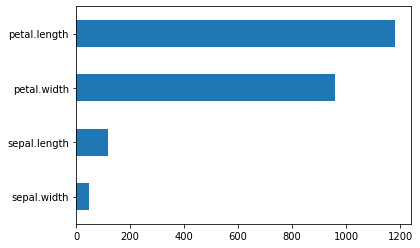

In [51]:
importancias = skb.scores_
importancias = pd.Series(data=importancias, index=X.columns.values)
importancias.sort_values().plot(kind='barh')

In [42]:
# [(2**x)-1 for x in range(1, 100)]

In [ ]:
# Filtros tem um problema (grave!)
# Filtros analisam as colunas (features) de forma independente!
# Mas qual é a nossa garantia que o SW, quando combinado com outra coluna, não nos daria um resultado bom?
# Interação de alta ordem

### Seleção baseada em árvores de decisao

In [55]:
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [56]:
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

In [57]:
dt.fit(X, y)
rf.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [58]:
importancias_dt = dt.feature_importances_
importancias_rf = rf.feature_importances_

In [59]:
importancias_dt = pd.Series(importancias_dt, index=X.columns.values)
importancias_rf = pd.Series(importancias_rf, index=X.columns.values)

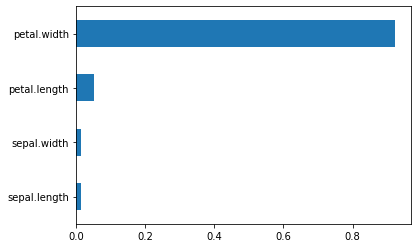

In [60]:
importancias_dt.sort_values().plot(kind='barh')

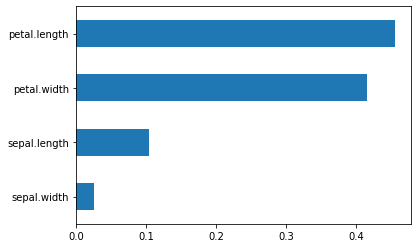

In [61]:
importancias_rf.sort_values().plot(kind='barh')

[Text(558.0, 498.3, 'petal.width <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = Setosa'),
 Text(472.15384615384613, 407.70000000000005, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = Setosa'),
 Text(643.8461538461538, 407.70000000000005, 'petal.width <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = Versicolor'),
 Text(343.38461538461536, 317.1, 'petal.length <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]\nclass = Versicolor'),
 Text(171.69230769230768, 226.5, 'petal.width <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]\nclass = Versicolor'),
 Text(85.84615384615384, 135.89999999999998, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]\nclass = Versicolor'),
 Text(257.53846153846155, 135.89999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = Virginica'),
 Text(515.0769230769231, 226.5, 'petal.width <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]\nclass = Virginica'),
 Text(429.23076923076917, 135.89999999999998

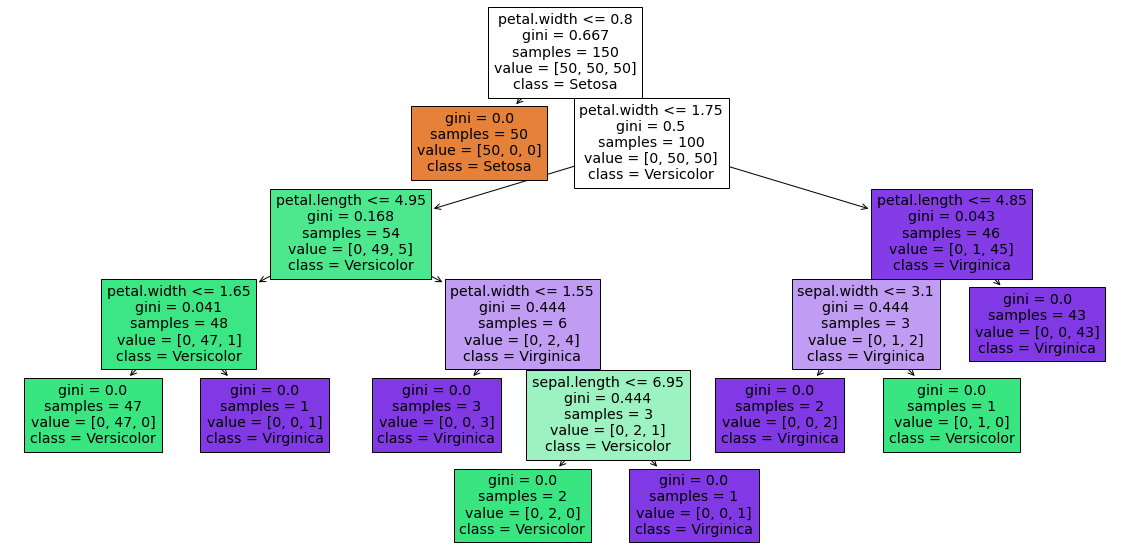

In [64]:
# plotando a arvore
fig = plt.figure(figsize=(20,10))
tree.plot_tree(dt, feature_names=X.columns.values,
               class_names=y.unique(), filled=True)